<a href="https://colab.research.google.com/github/GuyFarb/Cars-Project/blob/main/Get_Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import glob
data_dir = "/content/drive/MyDrive/Car196_project/data/"
# ◊ê◊ô◊™◊ï◊® ◊õ◊ú ◊ß◊ï◊ë◊¶◊ô ◊î-TFRecord ◊ë◊™◊ô◊ß◊ô◊ô◊î
train_files = glob.glob(data_dir + "cars196-train.tfrecord-*")
test_files = glob.glob(data_dir + "cars196-test.tfrecord-*")

# ◊î◊¶◊í◊™ ◊®◊©◊ô◊û◊™ ◊î◊ß◊ë◊¶◊ô◊ù ◊©◊†◊û◊¶◊ê◊ï
print("üìÇ ◊ß◊ë◊¶◊ô ◊ê◊ô◊û◊ï◊ü:", train_files)
print("üìÇ ◊ß◊ë◊¶◊ô ◊ë◊ì◊ô◊ß◊î:", test_files)

üìÇ ◊ß◊ë◊¶◊ô ◊ê◊ô◊û◊ï◊ü: ['/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00000-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00001-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00002-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00003-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00004-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00005-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00006-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00007-of-00008']
üìÇ ◊ß◊ë◊¶◊ô ◊ë◊ì◊ô◊ß◊î: ['/content/drive/MyDrive/Car196_project/data/cars196-test.tfrecord-00000-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-test.tfrecord-00001-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-test.tfrecord-00002-of-00008', '/content/drive/MyDrive/C

In [3]:
# ◊ß◊ï◊ë◊• ◊ú◊ì◊ï◊í◊û◊î
tfrecord_file = "/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00000-of-00008"

# ◊ô◊¶◊ô◊®◊™ dataset ◊ú◊ß◊®◊ô◊ê◊î
raw_dataset = tf.data.TFRecordDataset([tfrecord_file])

# ◊î◊¶◊í◊™ ◊®◊©◊ï◊û◊î ◊®◊ê◊©◊ï◊†◊î ◊õ◊ì◊ô ◊ú◊ë◊ì◊ï◊ß ◊ê◊™ ◊î◊û◊ë◊†◊î
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

features {
  feature {
    key: "label"
    value {
      int64_list {
        value: 194
      }
    }
  }
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\002\000\034\000\034\000\000\377\342\031\374ICC_PROFILE\000\001\001\000\000\031\354appl\002\020\000\000mntrRGB XYZ \007\332\000\006\000\027\000\024\000\014\000,acspAPPL\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\366\326\000\001\000\000\000\000\323-appl\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\021desc\000\000\001P\000\000\000bdscm\000\000\001\264\000\000\002Bcprt\000\000\003\370\000\000\000\320wtpt\000\000\004\310\000\000\000\024rXYZ\000\000\004\334\000\000\000\024gXYZ\000\000\004\360\000\000\000\024bXYZ\000\000\005\004\000\000\000\024rTRC\000\000\005\030\000\000

In [4]:
def parse_tfrecord(example):
  feature_description = {
      'image':tf.io.FixedLenFeature([],tf.string),
      'label':tf.io.FixedLenFeature([],tf.int64)
  }

  example = tf.io.parse_single_example(example,feature_description)
  image = tf.image.decode_jpeg(example['image'],channels=3)
  image = tf.image.resize(image,(224,224))
  image = tf.cast(image,tf.float32)/255.0

  label = example['label']
  return image,label

In [5]:
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# ◊ò◊¢◊ô◊†◊™ ◊ß◊ï◊ë◊¶◊ô ◊î-TFRecord
train_dataset = tf.data.TFRecordDataset(train_files)
test_dataset = tf.data.TFRecordDataset(test_files)

# ◊§◊¢◊†◊ï◊ó ◊î◊ß◊ï◊ë◊• ◊ï◊î◊í◊ì◊®◊™ ◊î-Pipeline
train_dataset = (train_dataset
    .map(parse_tfrecord, num_parallel_calls=AUTOTUNE)
    .shuffle(1000)  # ◊¢◊®◊ë◊ï◊ë ◊õ◊ì◊ô ◊ú◊û◊†◊ï◊¢ ◊ú◊û◊ô◊ì◊™ ◊ô◊™◊®
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

test_dataset = (test_dataset
    .map(parse_tfrecord, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

print("‚úÖ ◊î◊ì◊ê◊ò◊î ◊û◊ï◊õ◊ü ◊ú◊ê◊ô◊û◊ï◊ü!")

‚úÖ ◊î◊ì◊ê◊ò◊î ◊û◊ï◊õ◊ü ◊ú◊ê◊ô◊û◊ï◊ü!


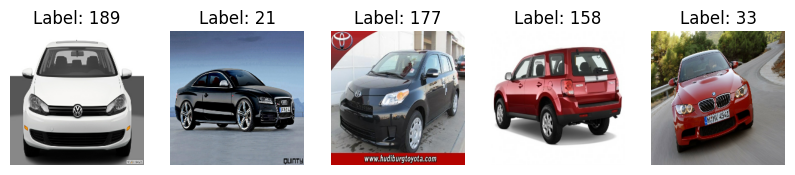

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for images, labels in train_dataset.take(1):  # ◊ú◊ï◊ß◊ó ◊ë◊ê◊¶' ◊®◊ê◊©◊ï◊ü
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(images[i].numpy())  # ◊î◊¶◊í◊™ ◊™◊û◊ï◊†◊î
        plt.title(f"Label: {labels[i].numpy()}")  # ◊î◊¶◊í◊™ ◊™◊ï◊ï◊ô◊™
        plt.axis("off")

plt.show()

#counter

In [42]:
train_count = sum(1 for _ in train_dataset)
test_count = sum(1 for _ in test_dataset)

print(f"üî¢ ◊û◊°◊§◊® ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ë◊ê◊ô◊û◊ï◊ü: {train_count}")
print(f"üî¢ ◊û◊°◊§◊® ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ë◊ë◊ì◊ô◊ß◊î: {test_count}")

üî¢ ◊û◊°◊§◊® ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ë◊ê◊ô◊û◊ï◊ü: 255
üî¢ ◊û◊°◊§◊® ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ë◊ë◊ì◊ô◊ß◊î: 252


#distribiotion

In [45]:
import collections
label_counts = collections.defaultdict(int)

for _, labels in train_dataset:
  for label in labels.numpy():
    label_counts[label]+=1


print(f"◊û◊°◊§◊® ◊û◊ó◊ú◊ß◊ï◊™/◊°◊ï◊í◊ô ◊®◊õ◊ë◊ô◊ù {len(label_counts)}")

list(label_counts.items())[:10]

◊û◊°◊§◊® ◊û◊ó◊ú◊ß◊ï◊™/◊°◊ï◊í◊ô ◊®◊õ◊ë◊ô◊ù 196


[(95, 41),
 (100, 42),
 (72, 45),
 (177, 42),
 (166, 48),
 (117, 42),
 (21, 43),
 (27, 41),
 (148, 43),
 (68, 38)]

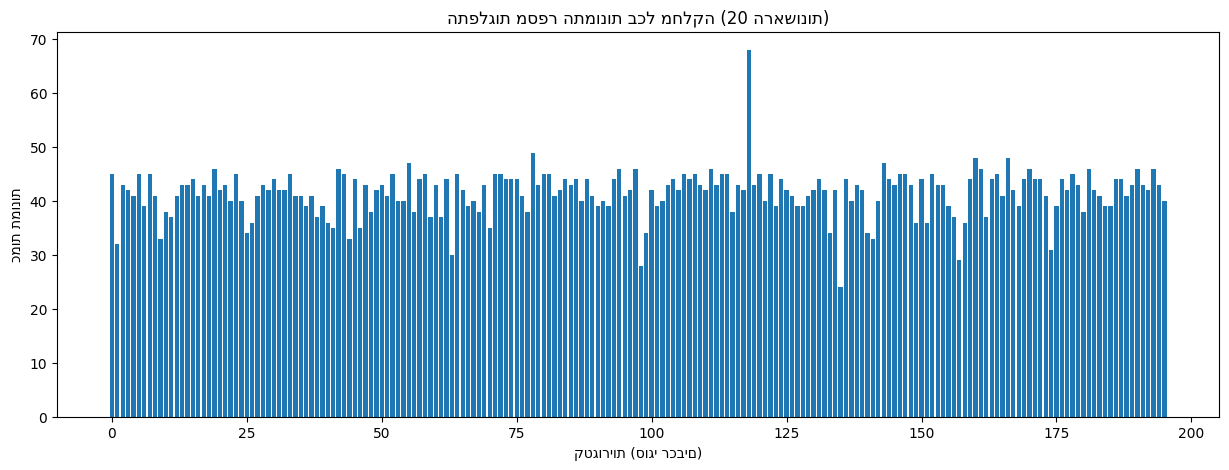

In [49]:
import matplotlib.pyplot as plt

# ◊û◊ô◊ï◊ü ◊î◊û◊ó◊ú◊ß◊ï◊™ ◊ú◊§◊ô ◊û◊°◊§◊® ◊™◊û◊ï◊†◊ï◊™
sorted_counts = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊î◊™◊§◊ú◊í◊ï◊™
plt.figure(figsize=(15,5))
plt.bar([x[0] for x in sorted_counts[:196]], [x[1] for x in sorted_counts[:196]])
plt.xlabel("◊ß◊ò◊í◊ï◊®◊ô◊ï◊™ (◊°◊ï◊í◊ô ◊®◊õ◊ë◊ô◊ù)")
plt.ylabel("◊õ◊û◊ï◊™ ◊™◊û◊ï◊†◊ï◊™")
plt.title("◊î◊™◊§◊ú◊í◊ï◊™ ◊û◊°◊§◊® ◊î◊™◊û◊ï◊†◊ï◊™ ◊ë◊õ◊ú ◊û◊ó◊ú◊ß◊î (20 ◊î◊®◊ê◊©◊ï◊†◊ï◊™)")
plt.show()

In [8]:
# prompt: save the data as "data_1"

import numpy as np

# Assuming 'train_dataset' is your TensorFlow Dataset
# and you want to save the image data as NumPy arrays.

data_1 = []

for images, labels in train_dataset:
  # Convert images to NumPy arrays
  image_arrays = images.numpy()

  # Append to data_1
  for image_array, label in zip(image_arrays, labels.numpy()):
      data_1.append((image_array, label))

# Now 'data_1' is a list of tuples, where each tuple contains an image (NumPy array) and its label.

# To save as a NumPy array file (optional):

# np.save("data_1.npy", np.array(data_1))

# To save as a pickle file (optional):

import pickle

with open('data_1.pickle', 'wb') as f:
  pickle.dump(data_1, f)
